In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)


In [3]:
# Genrate Data
N = 100
data = np.vstack([np.random.multivariate_normal([9, 0], np.identity(2), 100),
                  np.random.multivariate_normal([0 ,9], np.identity(2), 100),
                  np.random.multivariate_normal([5, 5], np.identity(2), 100)])

np.random.shuffle(data)

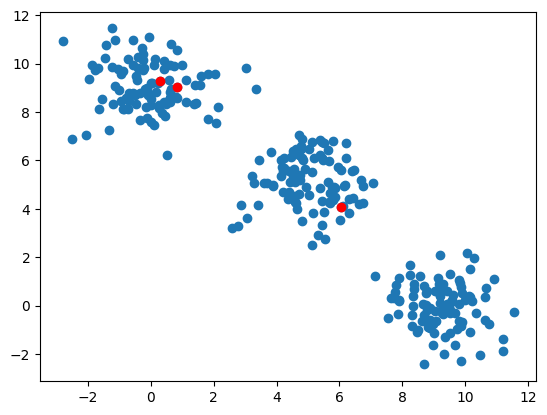

In [6]:
# No of Clusters
m = 3

# Get Random Centroids
centroids = data[np.random.randint(0, data.shape[0], m)]

# No of Rounds
epochs = 10

# Tolerance
delta = 1e-5

# Visualize Data
plt.scatter(data[:,0], data[:,1])
plt.scatter(centroids[:,0], centroids[:,1], c='red')
plt.show()

# Last Loss
last_loss = -np.inf

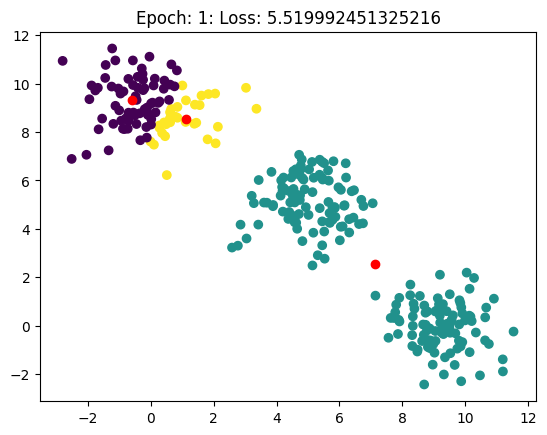

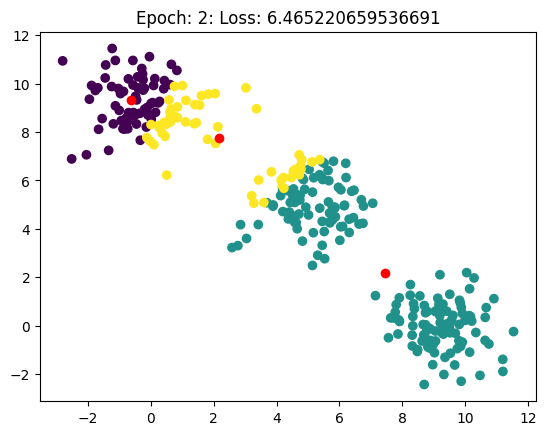

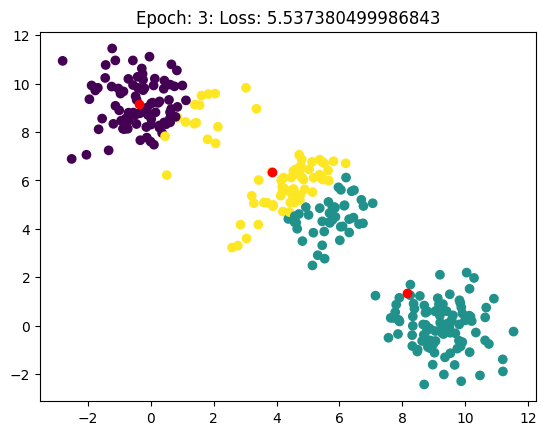

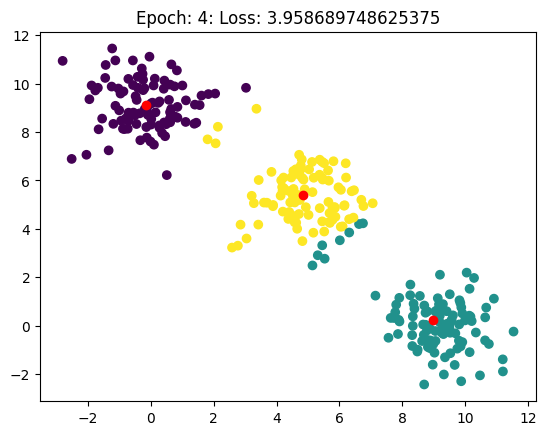

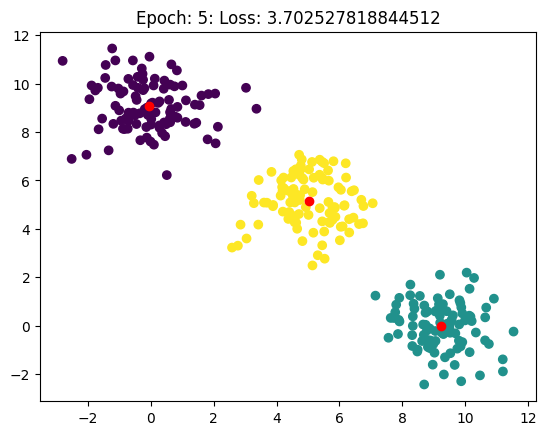

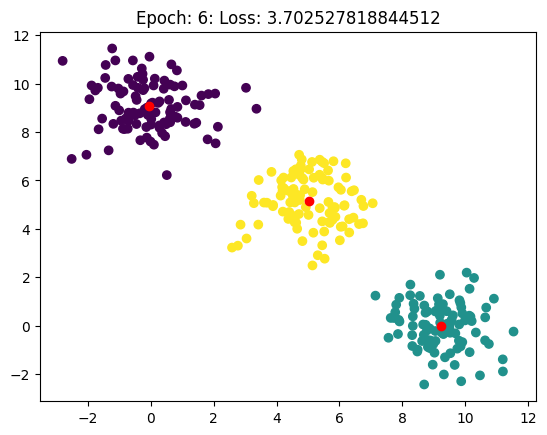

In [7]:
# Algorithms

for t in range(epochs) :
    # Discrepency
    loss = 0

    # Calcuatle Distance of points from Centroids
    dist = np.hstack([np.linalg.norm(data - centroids[i], ord=2, axis=1).reshape(-1, 1) for i in range(centroids.shape[0])])

    # Assign Clsuter to each data point
    cluster_id = np.argmin(dist, axis=1)

    # Update Cluster Centroid
    for i in range(m):
      centroids[i] = np.mean(data[cluster_id == i], axis=0)
      loss += np.mean(np.linalg.norm(data[cluster_id == i] - centroids[i], ord=2, axis=1))

    # Visualize Data
    plt.scatter(data[:,0], data[:,1], c=cluster_id)
    plt.scatter(centroids[:,0], centroids[:,1], c='r')
    plt.title(f"Epoch: {t+1}: Loss: {loss}")
    plt.show()

    # Update Loss
    if np.abs(last_loss - loss) < delta :
        break
    last_loss = loss